### Spotify

Rangsiman Ketkaew

In [3]:
import json
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data_song_sample.csv')
df.head()

,track_id,track_name,first_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,neg,neu,pos,compound
0,3ZOD3aghbxBkgKsLu2jOEK,These Memories,Hollow Coves,0.521,0.265,1,-18.229,1,0.0319,0.9610,0.133,0.0676,0.392,77.519,0.000,1.000,0.000,0.0000
1,7w87IxuO7BDcJ3YUqCyMTT,Pumped Up Kicks,Foster The People,0.733,0.710,5,-5.849,0,0.0292,0.1450,0.115,0.0956,0.965,127.975,0.059,0.676,0.265,0.9987
2,7w87IxuO7BDcJ3YUqCyMTT,Pumped Up Kicks,Foster The People,0.733,0.710,5,-5.849,0,0.0292,0.1450,0.115,0.0956,0.965,127.975,0.059,0.676,0.265,0.9987
3,5O2P9iiztwhomNh8xkR9lJ,Night Changes,One Direction,0.672,0.520,8,-7.747,1,0.0353,0.8590,0.000,0.1150,0.370,120.001,0.109,0.868,0.023,-0.9825
4,7pYfyrMNPn3wtoCyqcTVoI,"Moves Like Jagger - Studio Recording From ""The...",Maroon 5,0.722,0.761,11,-4.459,0,0.0475,0.0117,0.000,0.3150,0.624,128.044,NaN,NaN,NaN,NaN


In [5]:
df = df.drop_duplicates(subset='track_id', keep="first")
df.head()

,track_id,track_name,first_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,neg,neu,pos,compound
0,3ZOD3aghbxBkgKsLu2jOEK,These Memories,Hollow Coves,0.521,0.265,1,-18.229,1,0.0319,0.9610,0.133,0.0676,0.392,77.519,0.000,1.000,0.000,0.0000
1,7w87IxuO7BDcJ3YUqCyMTT,Pumped Up Kicks,Foster The People,0.733,0.710,5,-5.849,0,0.0292,0.1450,0.115,0.0956,0.965,127.975,0.059,0.676,0.265,0.9987
3,5O2P9iiztwhomNh8xkR9lJ,Night Changes,One Direction,0.672,0.520,8,-7.747,1,0.0353,0.8590,0.000,0.1150,0.370,120.001,0.109,0.868,0.023,-0.9825
4,7pYfyrMNPn3wtoCyqcTVoI,"Moves Like Jagger - Studio Recording From ""The...",Maroon 5,0.722,0.761,11,-4.459,0,0.0475,0.0117,0.000,0.3150,0.624,128.044,NaN,NaN,NaN,NaN
5,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.000,0.0931,0.931,95.977,0.021,0.775,0.204,0.9993


In [6]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,neg,neu,pos,compound
count,25.000000,25.000000,25.000000,25.000000,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,24.000000,24.000000,24.000000,24.000000
mean,0.657000,0.614280,5.880000,-6.688320,0.4,0.055424,0.381945,0.030175,0.143816,0.526960,120.054480,0.072125,0.792667,0.135167,0.425088
std,0.118375,0.187152,3.419552,3.208789,0.5,0.044754,0.357533,0.062015,0.092451,0.230339,26.473112,0.044859,0.088281,0.082971,0.782736
min,0.395000,0.243000,0.000000,-18.229000,0.0,0.027000,0.000094,0.000000,0.054600,0.125000,77.519000,0.000000,0.595000,0.000000,-0.982500
25%,0.608000,0.520000,2.000000,-7.747000,0.0,0.031900,0.022900,0.000000,0.091200,0.370000,99.048000,0.038500,0.759750,0.079750,-0.117125
50%,0.672000,0.652000,6.000000,-5.756000,0.0,0.040700,0.269000,0.000006,0.115000,0.509000,119.951000,0.061500,0.786500,0.123500,0.982550
75%,0.733000,0.754000,9.000000,-4.818000,1.0,0.058100,0.705000,0.000745,0.154000,0.721000,139.052000,0.111500,0.840000,0.181750,0.993025
max,0.877000,0.867000,11.000000,-3.083000,1.0,0.243000,0.961000,0.196000,0.392000,0.965000,181.832000,0.148000,1.000000,0.346000,0.999300


In [7]:
df.dtypes

track_id             object
track_name           object
first_artist         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
neg                 float64
neu                 float64
pos                 float64
compound            float64
dtype: object

## Data visualization

In [8]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

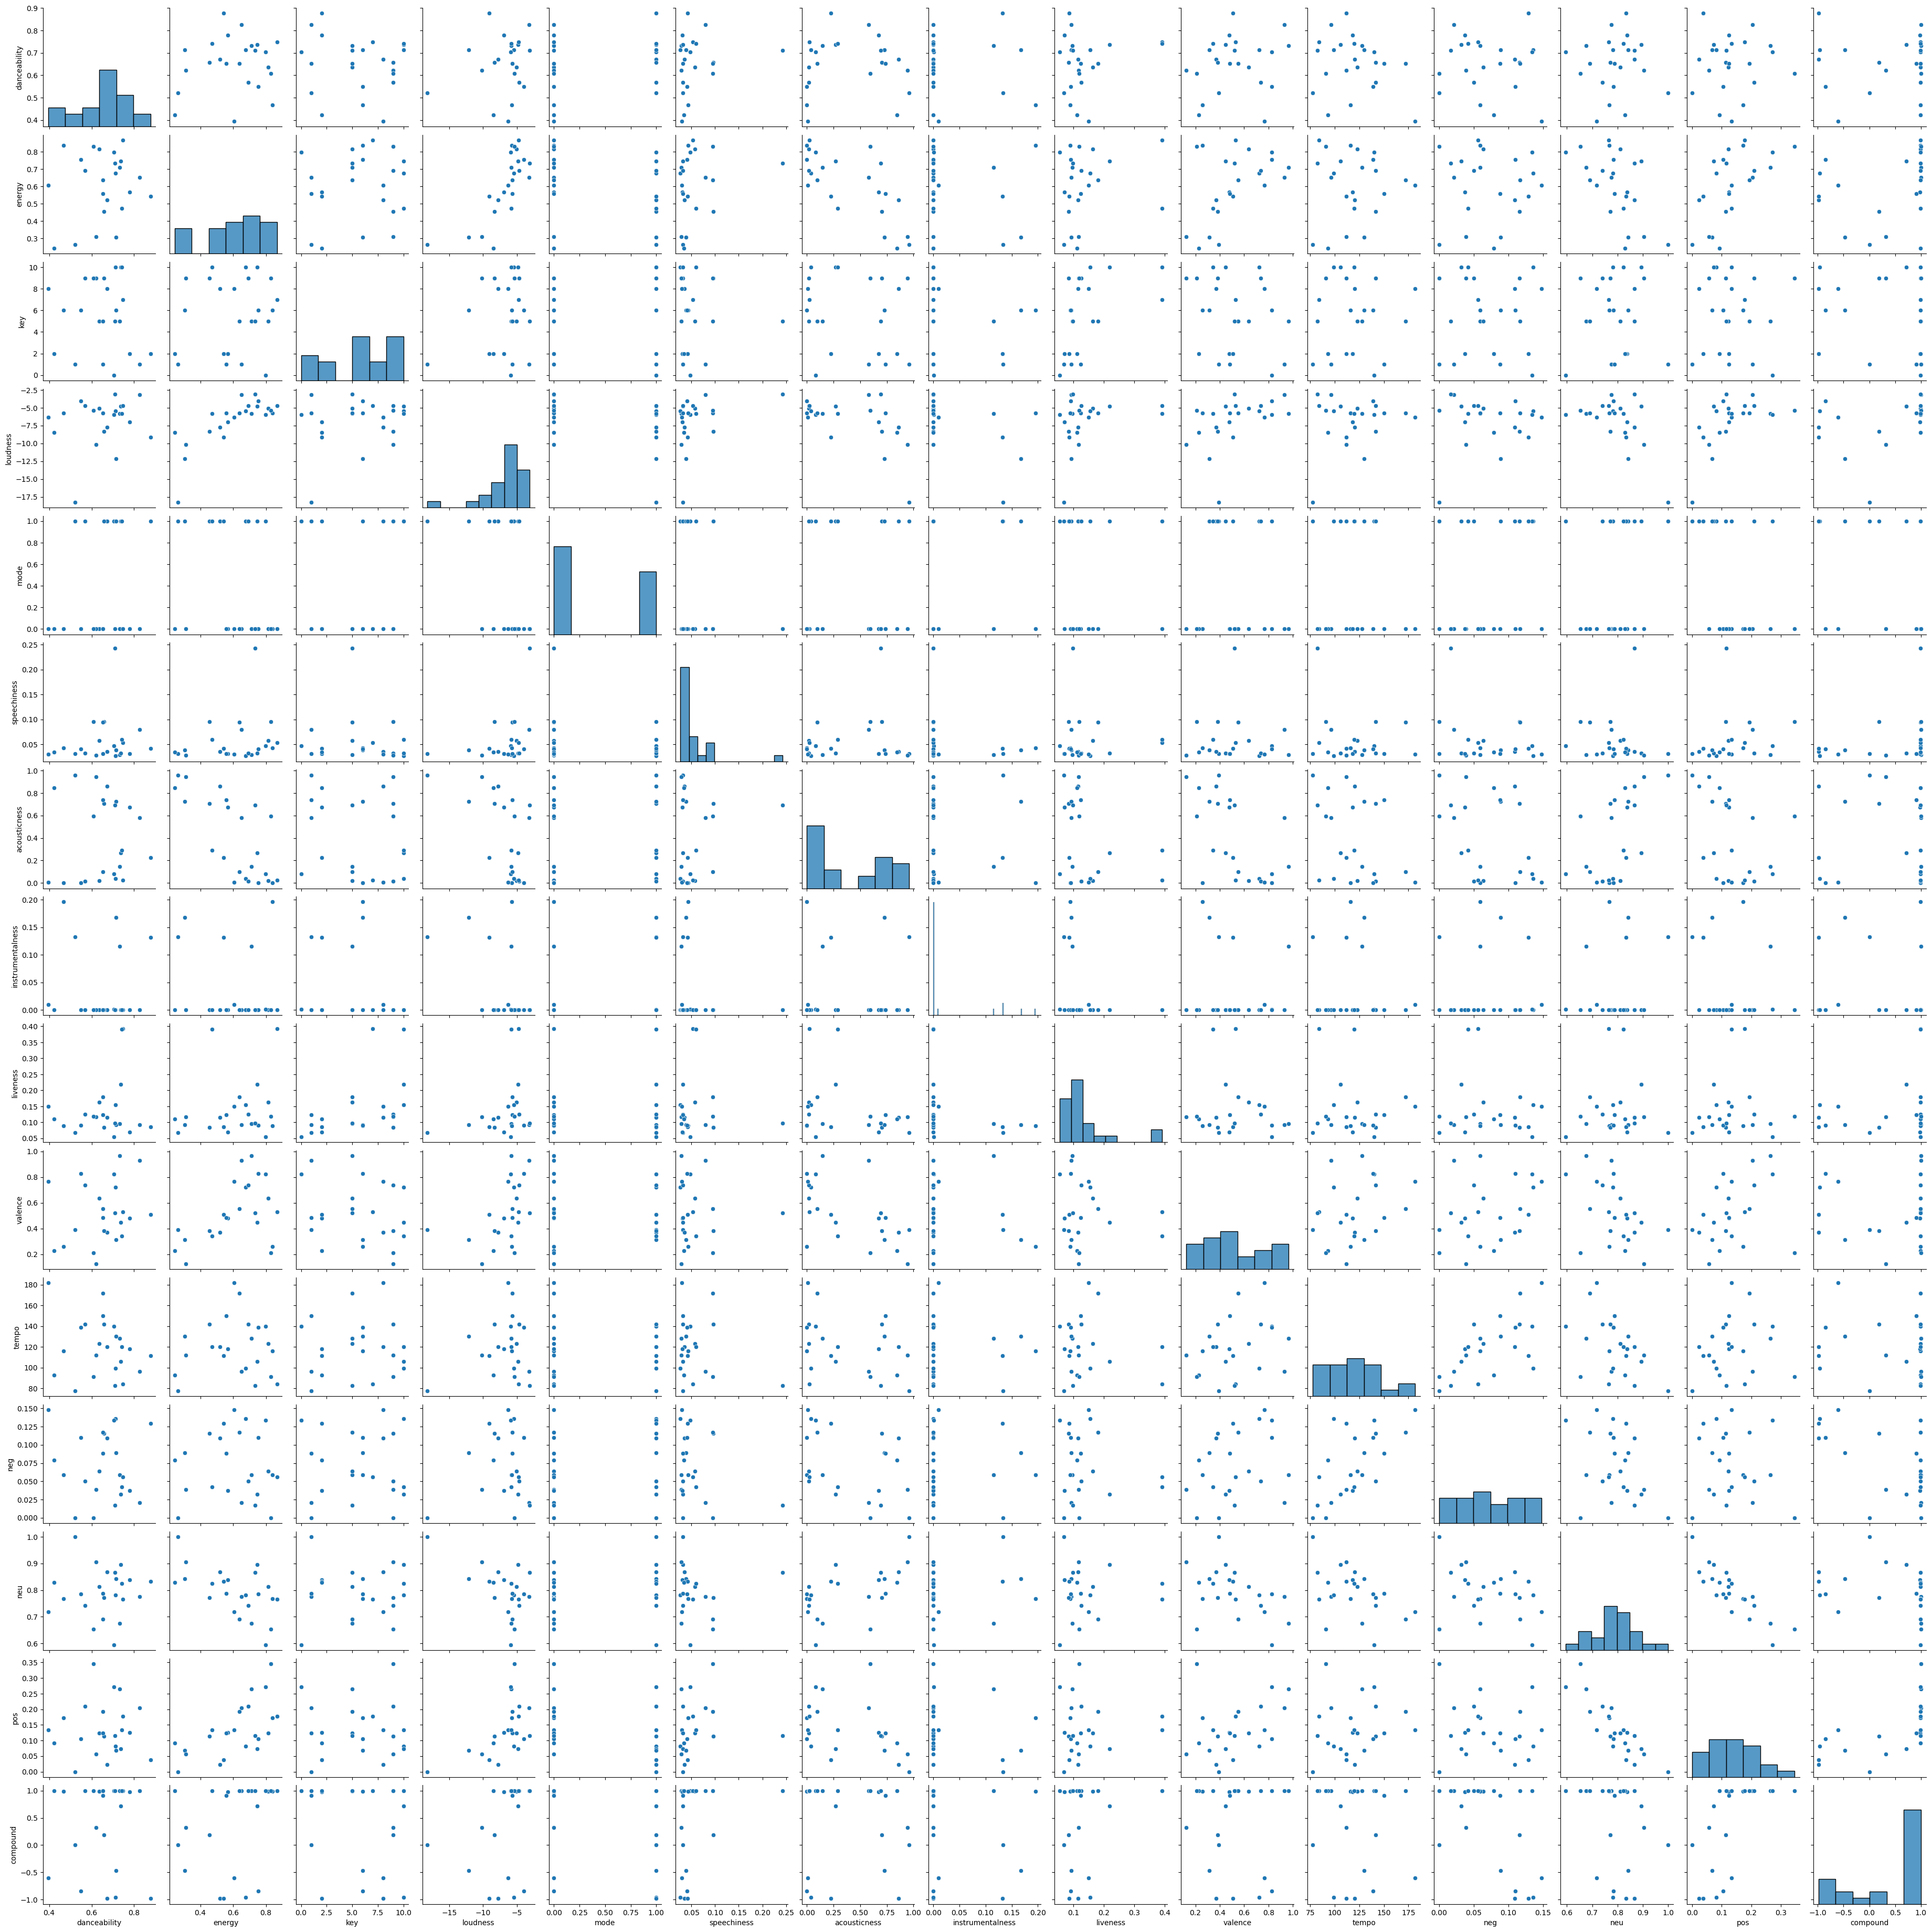

In [9]:
data_plot = df.select_dtypes(include=[np.number]).dropna()
# Plot numerical values
scatterplots = sns.pairplot(data_plot)
scatterplots.savefig('scatterplots.png')

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

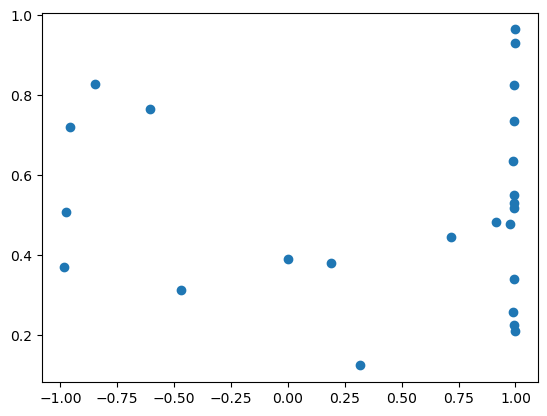

In [10]:
# Scatterplot
x = df['compound']
y = df['valence']
plt.scatter(x, y)

# Plot trendline
reg = np.polyfit(x,y,1)
trendline = np.poly1d(reg)

plt.plot(x,trendline(x),'r--')

In [11]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,neg,neu,pos,compound
danceability,1.000000,0.171934,-0.068142,0.206408,0.235832,0.159938,-0.016185,-0.057674,0.201172,0.213578,-0.226100,-0.082006,0.019393,0.025453,0.029372
energy,0.171934,1.000000,0.179879,0.769853,-0.297797,0.221515,-0.728825,-0.189848,0.233915,0.478386,0.053392,-0.010311,-0.574232,0.615874,0.288023
key,-0.068142,0.179879,1.000000,0.241628,0.151092,-0.009782,-0.262250,-0.236518,0.522795,-0.190762,0.089500,0.004673,0.009250,-0.013210,-0.196565
loudness,0.206408,0.769853,0.241628,1.000000,-0.399860,0.316857,-0.559705,-0.519592,0.304709,0.454250,0.174655,0.069072,-0.545340,0.542527,0.346363
mode,0.235832,-0.297797,0.151092,-0.399860,1.000000,-0.206389,0.081939,0.177426,-0.043951,-0.083789,-0.041752,0.222768,0.220360,-0.354472,-0.413775
speechiness,0.159938,0.221515,-0.009782,0.316857,-0.206389,1.000000,0.149426,-0.200328,-0.033922,-0.042768,-0.228574,-0.270963,-0.035515,0.184267,0.286386
acousticness,-0.016185,-0.728825,-0.262250,-0.559705,0.081939,0.149426,1.000000,0.015489,-0.373501,-0.583329,-0.370538,-0.379787,0.564176,-0.393421,-0.025631
instrumentalness,-0.057674,-0.189848,-0.236518,-0.519592,0.177426,-0.200328,0.015489,1.000000,-0.309792,-0.162828,-0.113012,-0.039822,0.174069,-0.163495,-0.197951
liveness,0.201172,0.233915,0.522795,0.304709,-0.043951,-0.033922,-0.373501,-0.309792,1.000000,-0.062247,-0.060164,-0.111342,0.015006,0.043590,0.216608
valence,0.213578,0.478386,-0.190762,0.454250,-0.083789,-0.042768,-0.583329,-0.162828,-0.062247,1.000000,0.310698,0.290230,-0.464594,0.336523,-0.037789


In [12]:
# Normalize values before calculating correlation matrix
from sklearn.preprocessing import Normalizer
normalized = Normalizer().fit_transform(data_plot)

norm_df = pd.DataFrame(normalized)
norm_df.columns = data_plot.columns
norm_corr = norm_df.corr()

norm_corr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,neg,neu,pos,compound
danceability,1.000000,0.581660,0.195179,-0.161817,0.163790,0.477451,0.287137,0.016806,0.449580,0.451292,-0.222941,-0.213952,0.680284,0.227036,0.184522
energy,0.581660,1.000000,0.378669,0.337526,-0.243509,0.495884,-0.269580,-0.147765,0.458297,0.468124,0.144163,-0.202359,0.254795,0.649464,0.404168
key,0.195179,0.378669,1.000000,0.173078,0.150104,0.144804,-0.131106,-0.259801,0.526244,-0.193264,-0.066475,-0.062548,0.142449,0.175689,-0.045109
loudness,-0.161817,0.337526,0.173078,1.000000,-0.468015,0.123104,-0.653429,-0.587392,0.074120,0.203294,0.933950,0.218891,-0.655723,0.389673,0.215094
mode,0.163790,-0.243509,0.150104,-0.468015,1.000000,-0.221558,0.103513,0.287339,0.011790,-0.021159,-0.523408,0.217384,0.233737,-0.451909,-0.512249
speechiness,0.477451,0.495884,0.144804,0.123104,-0.221558,1.000000,0.315041,-0.154797,0.096391,0.199902,0.041475,-0.341683,0.400306,0.302844,0.381874
acousticness,0.287137,-0.269580,-0.131106,-0.653429,0.103513,0.315041,1.000000,0.117116,-0.185941,-0.260018,-0.567566,-0.434556,0.660878,-0.178398,0.085762
instrumentalness,0.016806,-0.147765,-0.259801,-0.587392,0.287339,-0.154797,0.117116,1.000000,-0.240063,-0.098410,-0.475311,-0.077339,0.252413,-0.220722,-0.220359
liveness,0.449580,0.458297,0.526244,0.074120,0.011790,0.096391,-0.185941,-0.240063,1.000000,0.079706,-0.082209,-0.081933,0.305989,0.204432,0.303919
valence,0.451292,0.468124,-0.193264,0.203294,-0.021159,0.199902,-0.260018,-0.098410,0.079706,1.000000,0.107353,0.046400,0.117039,0.245206,0.055126


## Visualize feature correlations

In [13]:
def plot_corr(df, size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)

    plt.xticks(rotation=70)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)


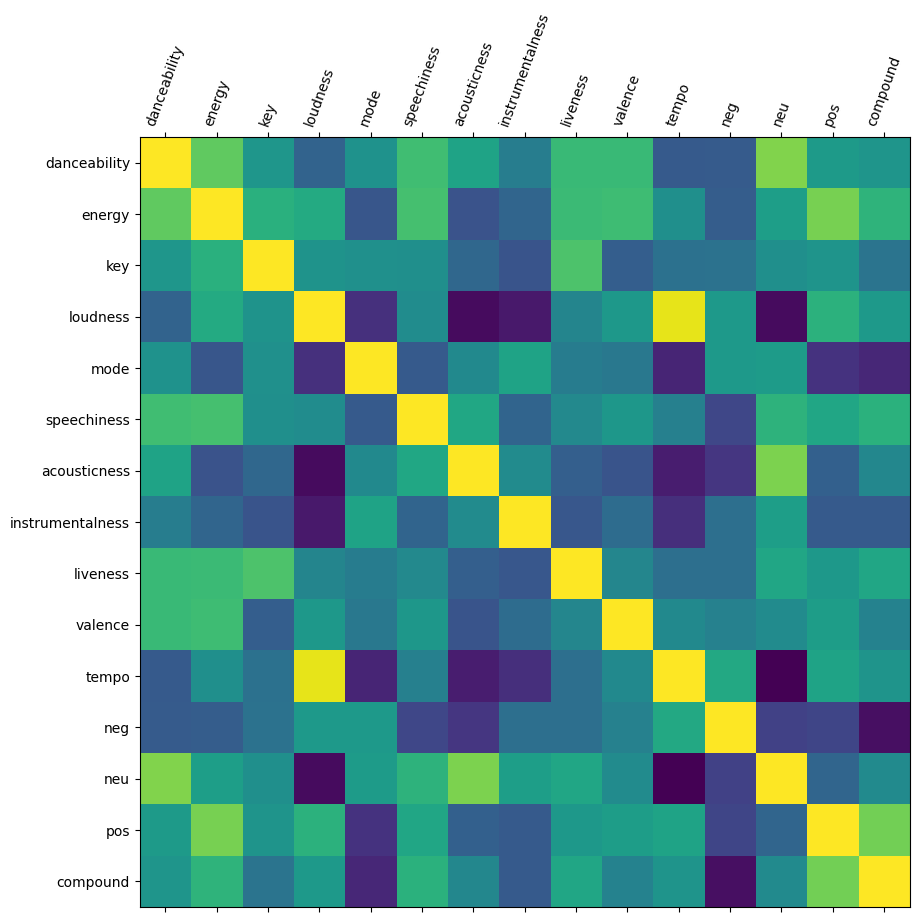

In [14]:
plot_corr(norm_df)
# Yellow: Positive correlation
# Blue: Negative correlation

In [15]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [16]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(norm_df, 20))

Top Absolute Correlations
loudness          tempo               0.933950
tempo             neu                 0.702335
danceability      neu                 0.680284
acousticness      neu                 0.660878
loudness          neu                 0.655723
                  acousticness        0.653429
energy            pos                 0.649464
pos               compound            0.636295
neg               compound            0.631080
loudness          instrumentalness    0.587392
danceability      energy              0.581660
acousticness      tempo               0.567566
key               liveness            0.526244
mode              tempo               0.523408
                  compound            0.512249
energy            speechiness         0.495884
danceability      speechiness         0.477451
instrumentalness  tempo               0.475311
energy            valence             0.468124
loudness          mode                0.468015
dtype: float64


In [17]:
def get_top_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Correlations")
print(get_top_correlations(norm_df, 20))

Top Correlations
loudness      tempo          0.933950
danceability  neu            0.680284
acousticness  neu            0.660878
energy        pos            0.649464
pos           compound       0.636295
danceability  energy         0.581660
key           liveness       0.526244
energy        speechiness    0.495884
danceability  speechiness    0.477451
energy        valence        0.468124
              liveness       0.458297
danceability  valence        0.451292
              liveness       0.449580
energy        compound       0.404168
speechiness   neu            0.400306
loudness      pos            0.389673
speechiness   compound       0.381874
energy        key            0.378669
              loudness       0.337526
tempo         neg            0.325962
dtype: float64


In [18]:
def get_bottom_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

print("Bottom Correlations")
print(get_bottom_correlations(norm_df, 20))

Bottom Correlations
tempo             neu                -0.702335
loudness          neu                -0.655723
                  acousticness       -0.653429
neg               compound           -0.631080
loudness          instrumentalness   -0.587392
acousticness      tempo              -0.567566
mode              tempo              -0.523408
                  compound           -0.512249
instrumentalness  tempo              -0.475311
loudness          mode               -0.468015
mode              pos                -0.451909
acousticness      neg                -0.434556
neg               neu                -0.374723
                  pos                -0.345315
speechiness       neg                -0.341683
energy            acousticness       -0.269580
acousticness      valence            -0.260018
key               instrumentalness   -0.259801
energy            mode               -0.243509
instrumentalness  liveness           -0.240063
dtype: float64


## Distance matrix

In [19]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(df.drop(['track_id', 'track_name', 'first_artist'], axis=1).values, metric='euclidean')
dist_matrix = squareform(distances)
# dist_matrix

## Cosine Similarity

In [20]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [21]:
df_clean = clean_dataset(df.drop(['track_id', 'track_name', 'first_artist'], axis=1))
df_clean

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,neg,neu,pos,compound
0,0.521,0.265,1.0,-18.229,1.0,0.0319,0.961000,0.133000,0.0676,0.392,77.519,0.000,1.000,0.000,0.0000
1,0.733,0.710,5.0,-5.849,0.0,0.0292,0.145000,0.115000,0.0956,0.965,127.975,0.059,0.676,0.265,0.9987
3,0.672,0.520,8.0,-7.747,1.0,0.0353,0.859000,0.000000,0.1150,0.370,120.001,0.109,0.868,0.023,-0.9825
5,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.931,95.977,0.021,0.775,0.204,0.9993
6,0.636,0.815,5.0,-5.098,0.0,0.0581,0.018500,0.000000,0.1630,0.636,123.063,0.064,0.812,0.123,0.9894
7,0.713,0.676,10.0,-5.483,1.0,0.0270,0.037700,0.000000,0.1540,0.721,99.048,0.136,0.782,0.082,-0.9579
8,0.704,0.797,0.0,-5.927,1.0,0.0475,0.082600,0.000745,0.0546,0.825,139.994,0.134,0.595,0.271,0.9927
9,0.468,0.838,6.0,-5.756,0.0,0.0433,0.000094,0.196000,0.0896,0.259,115.812,0.059,0.768,0.173,0.9871
12,0.737,0.747,10.0,-4.818,1.0,0.0323,0.269000,0.000000,0.2190,0.447,105.943,0.032,0.895,0.073,0.7162
16,0.657,0.456,9.0,-8.351,1.0,0.0961,0.705000,0.000009,0.0840,0.381,141.735,0.116,0.771,0.113,0.1896


In [22]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(df_clean)
cos_sim.shape

(24, 24)

<AxesSubplot:>

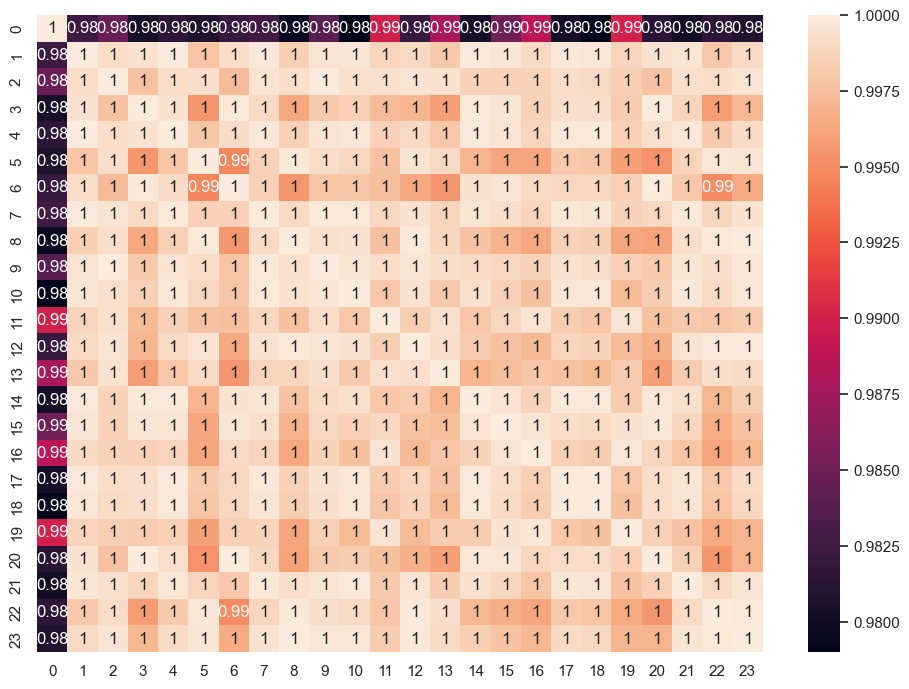

In [23]:
import seaborn as sns
%matplotlib inline

song_num = [str(i) for i in range(df_clean.shape[0])]
df_cos_sim = pd.DataFrame(cos_sim, index=song_num, columns=song_num)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(cos_sim, annot=True)

In [24]:
def get_top_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Correlations")
top_corr_songs = get_top_correlations(df_cos_sim, 20)
top_corr_songs = top_corr_songs.to_frame().reset_index()
top_corr_songs.columns = ["song_1", "song_2", "cos_sim"]
top_corr_songs

Top Correlations


,song_1,song_2,cos_sim
0,17,18,0.999760
1,1,4,0.999710
2,10,21,0.999579
3,12,23,0.999222
4,4,17,0.999176
5,5,22,0.998915
6,3,20,0.998767
7,4,18,0.998594
8,1,17,0.998084
9,8,12,0.998023


In [25]:
new_values = df['track_name'].to_dict()
new_values

{0: 'These Memories',
 1: 'Pumped Up Kicks',
 3: 'Night Changes',
 4: 'Moves Like Jagger - Studio Recording From "The Voice" Performance',
 5: 'Shape of You',
 6: 'Sugar (feat. Francesco Yates)',
 7: 'Beautiful Mistakes (feat. Megan Thee Stallion)',
 8: "I Ain't Worried",
 9: 'Mary On A Cross - slowed + reverb',
 12: 'Way Back Home (feat. Conor Maynard) - Sam Feldt Edit',
 16: 'Drive',
 17: 'Never Forget You',
 18: 'Stay Alive',
 19: 'Mama Said',
 20: 'Stay',
 24: 'Learn and Grow',
 25: "Ain't Nobody (Loves Me Better) (feat. Jasmine Thompson)",
 26: 'San Francisco Street',
 27: 'Anyone',
 28: 'What You Know',
 29: "Ain't Nobody (Loves Me Better) - Acoustic",
 30: 'Let Me Down Slowly',
 36: 'Suga Suga',
 37: 'Love Your Voice',
 49: '7 Years'}

In [26]:
top_corr_songs[['song_1', 'song_2']] = top_corr_songs[['song_1', 'song_2']].astype('int')

In [27]:
top_corr_songs_ = top_corr_songs.replace({'song_1': new_values})
top_corr_songs_ = top_corr_songs_.replace({'song_2': new_values})
top_corr_songs_

,song_1,song_2,cos_sim
0,Never Forget You,Stay Alive,0.999760
1,Pumped Up Kicks,"Moves Like Jagger - Studio Recording From ""The...",0.999710
2,10,21,0.999579
3,Way Back Home (feat. Conor Maynard) - Sam Feld...,23,0.999222
4,"Moves Like Jagger - Studio Recording From ""The...",Never Forget You,0.999176
5,Shape of You,22,0.998915
6,Night Changes,Stay,0.998767
7,"Moves Like Jagger - Studio Recording From ""The...",Stay Alive,0.998594
8,Pumped Up Kicks,Never Forget You,0.998084
9,I Ain't Worried,Way Back Home (feat. Conor Maynard) - Sam Feld...,0.998023
